What is a loan prediction system?
A mechanism called the Loan Prediction System allows you to apply for loans and receive notifications when they are approved. By the data provided by the applicant, the system notifies the applicant of the loan's availability.


In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [52]:
data = pd.read_excel('/content/drive/MyDrive/machine learning projects/Copy of loan.xlsx')


In [53]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [55]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


<Axes: >

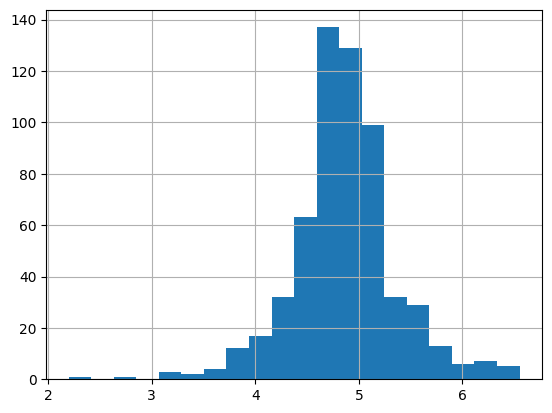

In [56]:
data['loanamount_log'] = np.log(data['LoanAmount'])
data['loanamount_log'].hist(bins=20)

<Axes: >

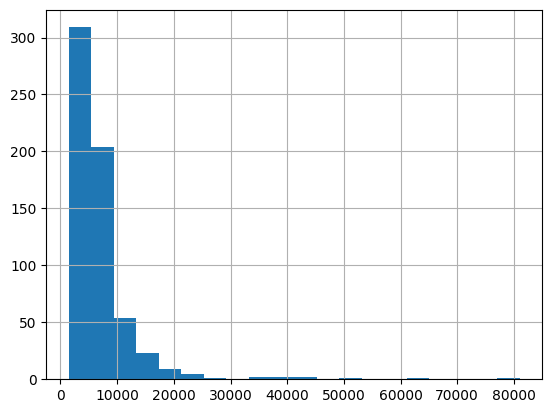

In [57]:
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data['TotalIncome_log'] = np.log(data['TotalIncome'])
data['TotalIncome'].hist(bins=20)

In [58]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)

data.LoanAmount = data.LoanAmount.fillna(data.LoanAmount.mean())
data.loanamount_log = data.loanamount_log.fillna(data.loanamount_log.mean())

data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [59]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [60]:
x = data.iloc[:,np.r_[1:5,9:11,13:15]].values
y = data.iloc[:,12].values

x

array([['Male', 'No', 0, ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', 1, ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', 0, ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', 1, ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', 2, ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', 0, ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [61]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

Number of people who take loan as group by Gender: 
Gender
Male      502
Female    112
Name: count, dtype: int64


<ipython-input-62-1a98efc69851>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='Set2')


<Axes: xlabel='Gender', ylabel='count'>

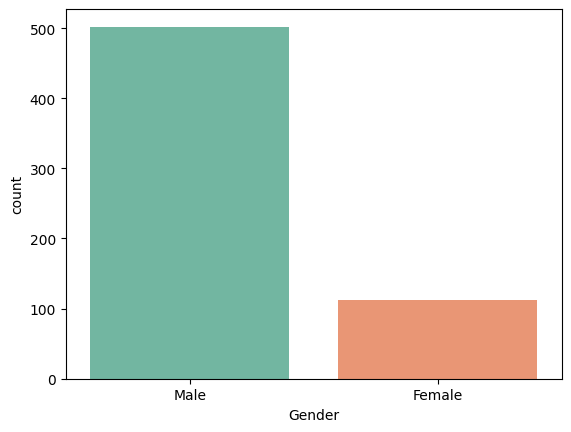

In [62]:
print('Number of people who take loan as group by Gender: ')
print(data['Gender'].value_counts())
sns.countplot(x='Gender', data=data, palette='Set2')

Number of people who take loan as group by Material Status: 
Married
Yes    401
No     213
Name: count, dtype: int64


<ipython-input-63-65a36489e899>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Married', data=data, palette='Set2')


<Axes: xlabel='Married', ylabel='count'>

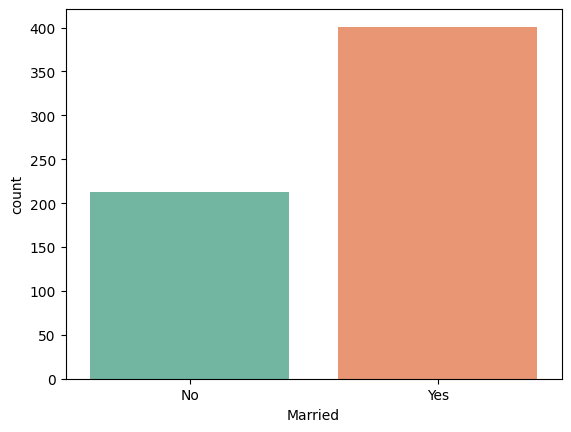

In [63]:
print('Number of people who take loan as group by Material Status: ')
print(data['Married'].value_counts())
sns.countplot(x='Married', data=data, palette='Set2')

Number of people who take loan as group by dependents: 
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


<ipython-input-64-d6be3a4200a1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dependents', data=data, palette='Set2')


<Axes: xlabel='Dependents', ylabel='count'>

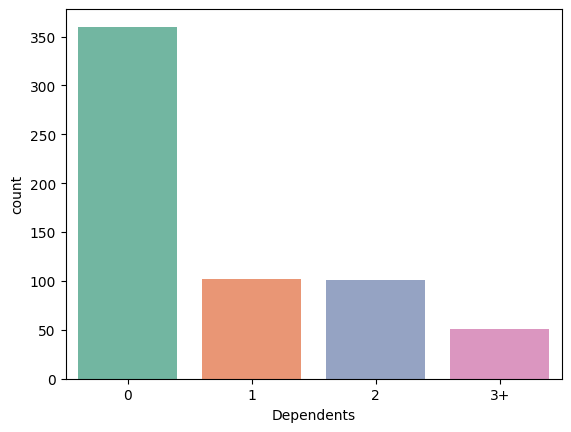

In [64]:
print('Number of people who take loan as group by dependents: ')
print(data['Dependents'].value_counts())
sns.countplot(x='Dependents', data=data, palette='Set2')

Number of people who take loan as group by self employed: 
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


<ipython-input-65-66e05fb46bfd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Self_Employed', data=data, palette='Set2')


<Axes: xlabel='Self_Employed', ylabel='count'>

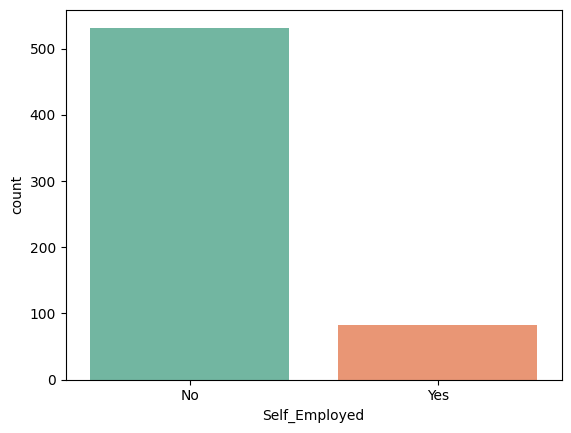

In [65]:
print('Number of people who take loan as group by self employed: ')
print(data['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed', data=data, palette='Set2')

Number of people who take loan as group by Loan A mount: 
LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: count, Length: 204, dtype: int64


<ipython-input-66-72747349e25e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LoanAmount', data=data, palette='Set1')


<Axes: xlabel='LoanAmount', ylabel='count'>

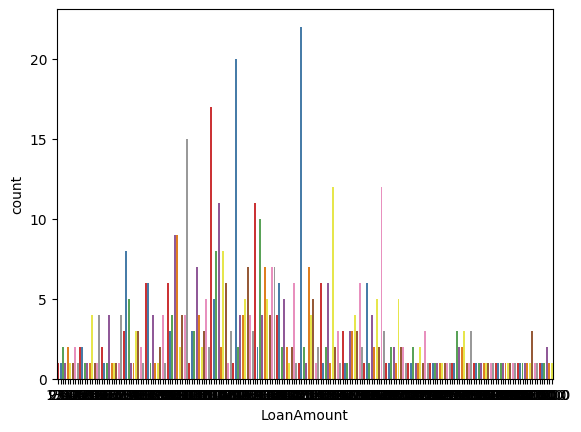

In [66]:
print('Number of people who take loan as group by Loan A mount: ')
print(data['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount', data=data, palette='Set1')

Number of people who take loan as group by Credit Historw: 
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


<ipython-input-67-6ec958695e5d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Credit_History', data=data, palette='Set2')


<Axes: xlabel='Credit_History', ylabel='count'>

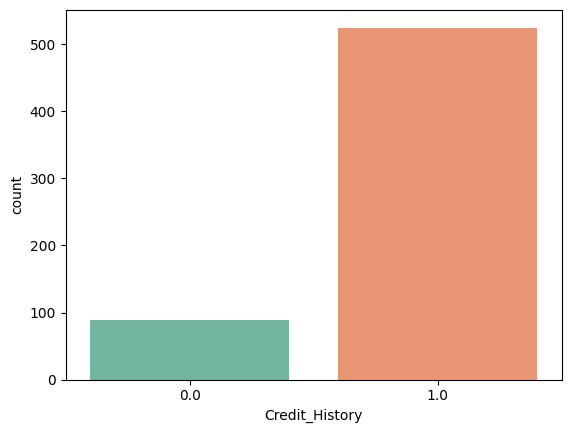

In [67]:
print('Number of people who take loan as group by Credit Historw: ')
print(data['Credit_History'].value_counts())
sns.countplot(x='Credit_History', data=data, palette='Set2')

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [69]:
label_encoder_x = LabelEncoder()

In [70]:
for i in range(0, 5):
    x_train[:, i] = x_train[:, i].astype(str)  # Convert to strings
    x_train[:, i] = label_encoder_x.fit_transform(x_train[:, i])

x_train[:, 7] = x_train[:, 7].astype(str)  # Convert to string for the 7th column
x_train[:, 7] = label_encoder_x.fit_transform(x_train[:, 7])


In [71]:
x_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 333],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 17],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 315],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 431],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 339],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 368]], dtype=object)

In [72]:
label_encoder_y = LabelEncoder()
y_train = label_encoder_y.fit_transform(y_train)

In [73]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [74]:
for i in range(0, 5):
    x_test[:, i] = x_test[:, i].astype(str)  # Convert to strings
    x_test[:, i] = label_encoder_x.fit_transform(x_test[:, i])

x_test[:, 7] = x_test[:, 7].astype(str)  # Convert to string for the 7th column
x_test[:, 7] = label_encoder_x.fit_transform(x_test[:, 7])


In [75]:
y_test = label_encoder_y.fit_transform(y_test)

In [76]:
x_train[0]

array([1, 1, 0, 0, 5, 1.0, 4.875197323201151, 333], dtype=object)

In [77]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [79]:
x_train[0]

array([ 0.47374983,  0.71143163, -0.76304669, -0.53102197,  0.27315958,
        0.41790088,  0.03484798,  0.77894402])

In [89]:
# Pipeline et Modèles
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=0),
    'SVM': SVC(kernel='linear', random_state=0),
    'Logistic Regression': LogisticRegression(random_state=0),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=0)
}

# Evaluation des modèles
results = []
for model_name, model in models.items():
    # Entraînement et Prédiction
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Evaluation des métriques
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    results.append({
        'model': model_name,
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix,
        'classification_report': class_report
    })

    print(f"Model: {model_name}")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)
    print("-" * 50)

# Comparer les résultats
for result in results:
    print(f"Model: {result['model']}")
    print("Accuracy:", result['accuracy'])
    print("Confusion Matrix:\n", result['confusion_matrix'])
    print("Classification Report:\n", result['classification_report'])
    print("=" * 50)

Model: Random Forest
Accuracy: 0.7804878048780488
Confusion Matrix:
 [[16 17]
 [10 80]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.48      0.54        33
           1       0.82      0.89      0.86        90

    accuracy                           0.78       123
   macro avg       0.72      0.69      0.70       123
weighted avg       0.77      0.78      0.77       123

--------------------------------------------------
Model: SVM
Accuracy: 0.8292682926829268
Confusion Matrix:
 [[14 19]
 [ 2 88]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123

--------------------------------------------------
Model: Logistic Regression
Acc

In [91]:
# Définir les modèles et les grilles de paramètres pour GridSearchCV
models_params = {
    'SVM': {
        'model': SVC(random_state=0),
        'params': {
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
            'gamma': ['scale', 'auto']
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(random_state=0, max_iter=10000),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2', 'elasticnet', 'none'],
            'solver': ['lbfgs', 'liblinear', 'saga']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9, 11],
            'weights': ['uniform', 'distance'],
            'algorithm': ['ball_tree', 'kd_tree', 'brute']
        }
    }
}



In [92]:
# Evaluation des modèles avec GridSearchCV et K-Fold
results = []
kf = KFold(n_splits=10, shuffle=True, random_state=0)


In [94]:

for model_name, model_params in models_params.items():
    grid_search = GridSearchCV(model_params['model'], model_params['params'], cv=kf, n_jobs=-1, verbose=1)
    grid_search.fit(x_train, y_train)

    # Meilleur modèle et hyperparamètres
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Prédiction sur les données de test
    y_pred = best_model.predict(x_test)

    # Evaluation des métriques
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    results.append({
        'model': model_name,
        'best_params': best_params,
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix,
        'classification_report': class_report
    })

    print(f"Model: {model_name}")
    print("Best Params:", best_params)
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)
    print("-" * 50)

# Comparer les résultats
for result in results:
    print(f"Model: {result['model']}")
    print("Best Params:", result['best_params'])
    print("Accuracy:", result['accuracy'])
    print("Confusion Matrix:\n", result['confusion_matrix'])
    print("Classification Report:\n", result['classification_report'])
    print("=" * 50)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
Model: SVM
Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.8292682926829268
Confusion Matrix:
 [[14 19]
 [ 2 88]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123

--------------------------------------------------
Fitting 10 folds for each of 60 candidates, totalling 600 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
350 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/

Model: Logistic Regression
Best Params: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.8292682926829268
Confusion Matrix:
 [[14 19]
 [ 2 88]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123

--------------------------------------------------
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Model: KNN
Best Params: {'algorithm': 'ball_tree', 'n_neighbors': 11, 'weights': 'uniform'}
Accuracy: 0.8211382113821138
Confusion Matrix:
 [[14 19]
 [ 3 87]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.42      0.56        33
           1       0.82      0.97      0.89        90

    accuracy                 